<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/4.1-2_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Network Analysis


### 4.1 Introduction


- **Network Analysis Importance**:
  - Social networks generate large data volumes.
  - Many datasets exhibit network-structured properties.
  - Correlation networks analyze relationships between variables, commonly used in biological studies.

- **Graph Models**:
  - Networks represented by graphs (nodes and edges).
  - Social graphs model relationships, e.g., social media interactions.
  - Applications: Friend recommendations, link predictions, collaborative filtering.

- **Community Structures**:
  - Clustering detects groups of nodes more connected internally than externally.
  - Essential for spatio-temporal insights and summarizing large datasets.
  - Spectral clustering is highlighted due to graph-structured data.

#### 4.1.1 Graph Models

##### **Graph Notation**
- A graph $G$ consists of:
  - **Nodes ($V$)**: $\{v_1, v_2, \dots, v_n\}$.
  - **Edges ($E$)**: $\{e_1, e_2, \dots, e_m\}$.
- Types of Graphs:
  - **Undirected**: Symmetric adjacency matrices.
  - **Directed**: Asymmetric adjacency matrices.
  - **Mixed**: Both directed and undirected edges.

---

##### **Path and Cycles**
- **Path**: Sequence of distinct edges connecting nodes.
- **Cycle**: A closed path.
- **Shortest Path**: Minimal edge traversal between two nodes.
- **Neighborhood**: Nodes within a defined "hop" distance.

---

##### **Node Degree**
- **Degree**: Number of edges connected to a node.
  - **In-Degree**: Edges pointing to a node.
  - **Out-Degree**: Edges pointing away from a node.
- Importance in social media:
  - Degree centrality reflects importance/popularity (e.g., Facebook friends, Twitter followers).


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

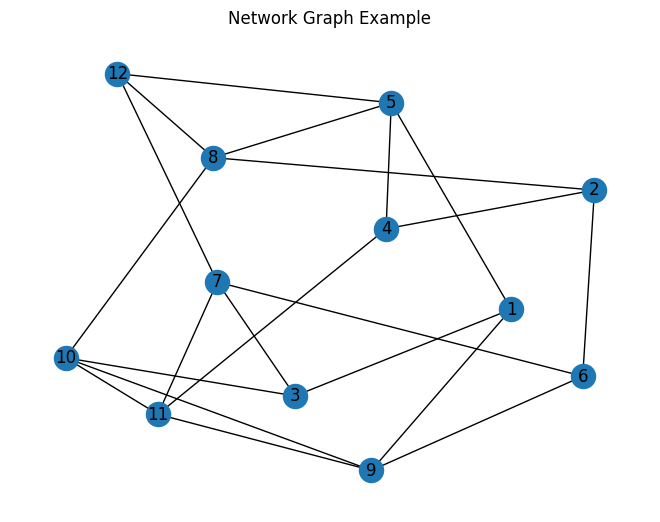

In [58]:
G = nx.Graph()

# Nodes
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Edges
G.add_edges_from([
    (1, 3), (1, 5), (1, 9),
    (2, 4), (2, 6), (2, 8),
    (3, 7), (3, 10),
    (4, 5), (4, 11),
    (5, 8), (5, 12),
    (6, 7), (6, 9),
    (7, 11), (7, 12),
    (8, 10), (8, 12),
    (9, 10), (9, 11),
    (10, 11),
])

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Network Graph Example")
plt.show()

#### 4.1.2 Laplacian Matrix

##### **Definition**
- A graph with $n$ nodes is represented by an $n \times n$ adjacency matrix:
  - $M_{ij} = 1$ if nodes $v_i$ and $v_j$ are connected; $0$ otherwise.
- The **Laplacian Matrix**, $L$, is defined as:
  $$
  L_{ij} =
  \begin{cases}
  \sum_k E_{ik}, & i = j \\
  -E_{ij}, & i \neq j \text{ and } v_i \text{ is adjacent to } v_j \\
  0, & \text{otherwise.}
  \end{cases}
  $$

---

##### **Theorem**
The Laplacian matrix $L$ has the following properties:
1. $L = D - M$, where $M$ is the adjacency matrix and $D$ is the diagonal degree matrix, $D_{ii} = \sum_k E_{ik}$.
2. $L = I_G I_G^T$, where $I_G$ is the incidence matrix of the graph.
3. $L$ is symmetric and positive semi-definite. All eigenvalues of $L$ are real and non-negative, and $L$ has a full set of $n$ real and orthogonal eigenvectors.
4. Let $e = [1, ..., 1]^T$. Then $Le = 0$, making $0$ the smallest eigenvalue with $e$ as the corresponding eigenvector.
5. If the graph $G$ has $c$ connected components, $L$ has $c$ eigenvalues that are $0$.
6. For any vector $x$, $x^T L x = \sum_{(i, j) \in E} E_{ij}(x_i - x_j)^2$.
7. For any vector $x$ and scalars $\alpha, \beta$, $(\alpha x + \beta e)^T L (\alpha x + \beta e) = \alpha^2 x^T L x$.
8. The optimization problem:
   $$
   \min_{x \neq 0} x^T L x, \text{ subject to } x^T x = 1, x^T e = 0,
   $$
   is solved when $x$ is the eigenvector corresponding to the second smallest eigenvalue ($\lambda_2$, the Fiedler vector) of the eigenvalue problem:
   $$
   Lx = \lambda x.
   $$

---

##### **Applications of Laplacian Matrix**
- Graph partitioning and clustering.
- Eigenvalues provide insights into graph connectivity and community structures.
- Fiedler vector aids in spectral clustering.

---

##### **Theorem (Courant-Fischer Theorem)**
Let $A$ be an $n \times n$ symmetric matrix with an orthogonal diagonalization $A = P D P^{-1}$. The columns of $P$ are orthonormal eigenvectors $v_1, v_2, ..., v_n$ of $A$. Assume the diagonal entries of $D$ are ordered as $\lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$. Let $S_k$ be the span of $v_1, v_2, ..., v_k$ and $S_k^\perp$ the orthogonal complement of $S_k$. Then:
$$
\min_{x \neq 0, x \in S_{k-1}^\perp} \frac{x^T A x}{x^T x} = \lambda_k.
$$

When $k = 2$, $S_1^\perp$ contains all $x$ such that $x \perp v_1$, or $v_1^T x = 0$.

---

##### **Corollary**
Let $A$ be an $n \times n$ symmetric matrix with an orthogonal diagonalization $A = P D P^{-1}$. The columns of $P$ are orthonormal eigenvectors $v_1, v_2, ..., v_n$ of $A$. Assume the diagonal entries of $D$ are ordered as $\lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$. Then:
$$
\min_{x \neq 0, v_1^T x = 0} \frac{x^T A x}{x^T x} = \lambda_2.
$$



In [59]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 1 0 0]
 [0 1 0 0 1 0 0 0 0 0 1 0]
 [1 0 0 1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 0 1 1]
 [0 1 0 0 1 0 0 0 0 1 0 1]
 [1 0 0 0 0 1 0 0 0 1 1 0]
 [0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 0 1 0 0 1 0 1 1 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0]]


In [66]:
def laplacian_matrix(graph: nx.Graph):
    """
    Compute the Laplacian Matrix of a given graph.
    """
    adjacency_matrix = nx.adjacency_matrix(graph)
    degree_matrix = np.diag(np.sum(adjacency_matrix, axis=1))

    return degree_matrix - adjacency_matrix

In [67]:
L = laplacian_matrix(graph=G)
print(L)

[[ 3  0 -1  0 -1  0  0  0 -1  0  0  0]
 [ 0  3  0 -1  0 -1  0 -1  0  0  0  0]
 [-1  0  3  0  0  0 -1  0  0 -1  0  0]
 [ 0 -1  0  3 -1  0  0  0  0  0 -1  0]
 [-1  0  0 -1  4  0  0 -1  0  0  0 -1]
 [ 0 -1  0  0  0  3 -1  0 -1  0  0  0]
 [ 0  0 -1  0  0 -1  4  0  0  0 -1 -1]
 [ 0 -1  0  0 -1  0  0  4  0 -1  0 -1]
 [-1  0  0  0  0 -1  0  0  4 -1 -1  0]
 [ 0  0 -1  0  0  0  0 -1 -1  4 -1  0]
 [ 0  0  0 -1  0  0 -1  0 -1 -1  4  0]
 [ 0  0  0  0 -1  0 -1 -1  0  0  0  3]]


### 4.2 Spectral Graph Bipartitioning

##### **Definition**
Graph partitioning aims to divide the set of nodes in a graph into subsets such that the **cut** (the total number of edges between the subsets) is minimized.

For a weighted graph $G = (V, E)$, given a bipartition of $V$ into disjoint subsets $V_1$ and $V_2$ ($V_1 \cup V_2 = V$), the cut between them is defined as:
$$
\text{cut}(V_1, V_2) = \sum_{i \in V_1, j \in V_2} M_{ij}.
$$

---

##### **Partition Vector**
Let the **partition vector** $p$ represent the division as:
$$
p_i =
\begin{cases}
+1, & \text{if } i \in V_1, \\
-1, & \text{if } i \in V_2.
\end{cases}
$$

The cut can be expressed using the **Rayleigh Quotient**:
$$
\frac{p^T L p}{p^T p} = \frac{1}{n} \cdot 4 \cdot \text{cut}(V_1, V_2).
$$

---

##### **Lemma**
Given the Laplacian matrix $L$ of $G$ and the partition vector $p$, the Rayleigh Quotient satisfies:
$$
\frac{p^T L p}{p^T p} = \frac{1}{n} \cdot 4 \cdot \text{cut}(V_1, V_2).
$$

This shows that minimizing the cut corresponds to minimizing the Rayleigh Quotient with the partition vector $p$.

---

##### **Balanced Cuts**
In practical applications, partitions need to balance the sizes of $V_1$ and $V_2$. An **objective function** to balance cuts is defined as:
$$
Q(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{\text{weight}(V_1)} + \frac{\text{cut}(V_1, V_2)}{\text{weight}(V_2)},
$$
where $\text{weight}(V_l) = \sum_{i \in V_l} w_{ii}$, and $w_{ii}$ is the weight of each vertex.

---

##### **Theorem**
The **generalized partition vector** $q$ is defined as:
$$
q_i =
\begin{cases}
+\sqrt{\frac{\nu_2}{\nu_1}}, & \text{if } i \in V_1, \\
-\sqrt{\frac{\nu_1}{\nu_2}}, & \text{if } i \in V_2.
\end{cases}
$$
where $\nu_1 = \text{weight}(V_1)$ and $\nu_2 = \text{weight}(V_2)$.

The following properties hold:
1. $q^T W e = 0$ and $q^T W q = \nu_1 + \nu_2$.
2. The Rayleigh Quotient for $q$ is:
   $$
   \frac{q^T L q}{q^T W q} = \frac{\text{cut}(V_1, V_2)}{\nu_1} + \frac{\text{cut}(V_1, V_2)}{\nu_2}.
   $$
3. The minimization problem:
   $$
   \min_{q \neq 0} \frac{q^T L q}{q^T W q}, \text{ subject to } q^T W e = 0,
   $$
   is solved when $q$ is the eigenvector corresponding to the second smallest eigenvalue $\lambda_2$ of the generalized eigenvalue problem:
   $$
   L x = \lambda W x.
   $$

---

##### **Ratio Cut and Normalized Cut**
Two commonly used cut metrics are:
1. **Ratio Cut**:
   $$
   \text{Ratio Cut}(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{|V_1|} + \frac{\text{cut}(V_1, V_2)}{|V_2|}.
   $$

2. **Normalized Cut**:
   $$
   \text{Normalized Cut}(V_1, V_2) = \frac{\text{cut}(V_1, V_2)}{\text{vol}(V_1)} + \frac{\text{cut}(V_1, V_2)}{\text{vol}(V_2)},
   $$
   where $\text{vol}(V_l) = \sum_{j \in V_l} d_j$, and $d_j$ is the degree of node $j$.

Both metrics minimize the edges between communities while avoiding trivial partitions.

---

##### **Example**
For the graph in Figure 4.3, consider two partitions:

1. **Partition $\pi_1$**:
   - $C_1 = \{9\}$ and $C_2 = \{1, 2, 3, 4, 5, 6, 7, 8\}$.
   - Calculations:
     - $\text{cut}(C_1, C_2) = 1$
     - $|C_1| = 1$, $|C_2| = 8$
     - $\text{vol}(C_1) = 1$, $\text{vol}(C_2) = 27$
   - Results:
     $$
     \text{Ratio Cut}(\pi_1) = \frac{1}{1} + \frac{1}{8} = 1.12,
     $$
     $$
     \text{Normalized Cut}(\pi_1) = \frac{1}{1} + \frac{1}{27} = 1.04.
     $$

2. **Partition $\pi_2$**:
   - $C_1 = \{1, 2, 3, 4\}$ and $C_2 = \{5, 6, 7, 8, 9\}$.
   - Calculations:
     - $\text{cut}(C_1, C_2) = 2$
     - $|C_1| = 4$, $|C_2| = 5$
     - $\text{vol}(C_1) = 12$, $\text{vol}(C_2) = 16$
   - Results:
     $$
     \text{Ratio Cut}(\pi_2) = \frac{2}{4} + \frac{2}{5} = 0.9,
     $$
     $$
     \text{Normalized Cut}(\pi_2) = \frac{2}{12} + \frac{2}{16} = 0.3.
     $$

3. **Comparison**:
- Although Partition $\pi_1$ minimizes the number of cuts, Partition $\pi_2$ is preferable as it achieves better balance according to both the **Ratio Cut** and **Normalized Cut** metrics.


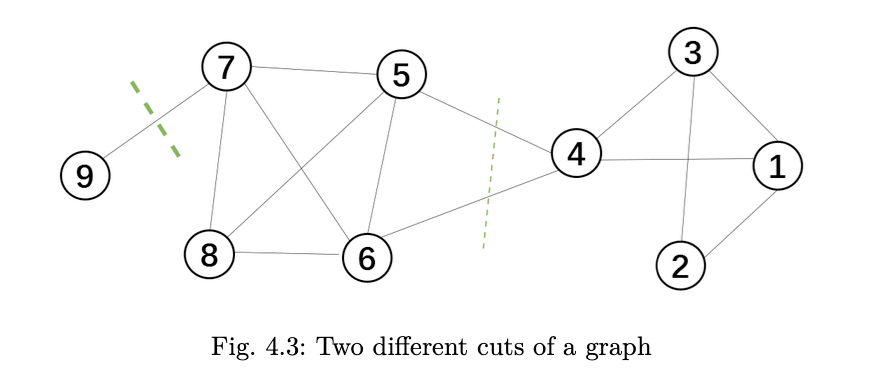

### Demo

In [72]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

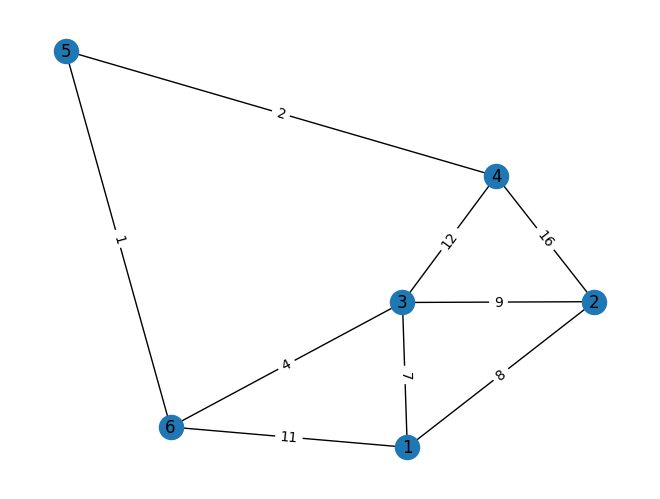

In [101]:
# Weighted graph
G = nx.Graph()
G.add_weighted_edges_from([
  (1, 2, 8),
  (1, 3, 7),
  (1, 6, 11),
  (2, 3, 9),
  (2, 4, 16),
  (3, 4, 12),
  (3, 6, 4),
  (4, 5, 2),
  (5, 6, 1),
])

pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

In [102]:
# Laplacian matrix
L = nx.laplacian_matrix(G)
L = L.todense()
print("Laplacian Matrix:\n", L)

Laplacian Matrix:
 [[ 26  -8  -7 -11   0   0]
 [ -8  33  -9   0 -16   0]
 [ -7  -9  32  -4 -12   0]
 [-11   0  -4  16   0  -1]
 [  0 -16 -12   0  30  -2]
 [  0   0   0  -1  -2   3]]


In [106]:
# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)

# Sort the eigenvalues and eigenvectors
idx = eigenvalues.argsort()

# Get the first eigenvector
eigenvector = eigenvectors[:, idx[1]]
print("Eigenvector:\n", eigenvector)
print("Eigenvalues:\n", eigenvalues)


Eigenvector:
 [ 0.21500458  0.19002798  0.19410347  0.17826815  0.13380536 -0.91120954]
Eigenvalues:
 [ 0.          3.48932639 12.82917086 49.96823316 32.63824681 41.07502278]


In [107]:
# Partition vector
partition_vector = np.sign(eigenvector)
print(partition_vector)

[ 1.  1.  1.  1.  1. -1.]
